## Introduction
The business problem revolves around the potential inefficiency of the current product page layout on a cooking equipment website, which currently utilizes a horizontal media rail. The investigation aims to determine whether changing the media rail orientation to vertical could lead to improvements in key performance indicators (KPIs) such as page views, gross merchandise value (GMV), clicks on media, and time spent on the page.
The primary metric chosen for this analysis is the number of add to cart actions. The company is keen on enhancing its product page by altering the media rail location, and tracking the number of add to cart actions is a crucial indicator of user interaction and potential conversion. Secondary metrics include the number of page views, time on page (sec), and clicks on media. Successful performance in these secondary metrics could provide additional positive insights.

This analysis is vital for the company as the product page serves as a critical touchpoint in the customer journey. Positive changes in this area could result in heightened user engagement, improved conversion rates, and ultimately, increased revenue.

### Benefits:
Increased conversion rates: A vertical media rail may encourage more users to add items to their carts.
Enhanced user engagement: Users might find it easier to explore and interact with products.
Potential revenue boost: Improved user experience could lead to higher sales.
### Drawbacks:
User adjustment period: Existing users may need time to adapt to the new layout.
Possible negative impact: If the vertical rail doesn't perform well, it could adversely affect user experience and conversion rates.

### Hypothesis
Null Hypothesis (H0): Changing the media rail from horizontal to vertical will have no significant effect on the number of add to cart actions.
Alternative Hypothesis (H1): This change will have a significant effect on the number of add to cart actions.

### Methodology
An A/B test was chosen as the methodology to evaluate the hypothesis. This allows for a direct comparison between two variants (horizontal vs. vertical media rail), controls for confounding variables through random user assignment, and provides statistically supported insights.

The primary metric for this test is the number of add to cart actions, reflecting user engagement and conversion. Secondary metrics include clicks on media, number of page views, and time spent on the page, offering a comprehensive view of user behavior.

Applied Test and Results:
The independent t-test (two-sample t-test) was employed for each metric with a significance level (alpha) of 0.05. The sample size was determined to be sufficient for reliable results.

### Results:

Reject null hypothesis for:
Number of add to cart (t-statistic: -8.7774, p-value: 1.0000).
Fail to reject null hypothesis for:
Clicks on media (t-statistic: 3.1711, p-value: 0.0008).
Number of page views (t-statistic: -3.1882, p-value: 0.9993).
GMV (in $) (t-statistic: -1.2840, p-value: 0.9003).
Time on Page (sec) (t-statistic: 0.5554, p-value: 0.2893).

### Conclusion and Recommendations
The vertical media rail did not significantly impact the number of add to cart actions, as indicated by the failure to reject the null hypothesis. While there was a statistically significant increase in clicks on media, the primary metric did not show the same positive effect.

Considering these results, it is not recommended to implement the change to the layout at this time. The inconclusive findings, along with potential disruptions and resource implications, suggest further testing is needed. Conducting tests over an extended period, increasing the sample size, and analyzing the distribution of changes could provide more conclusive insights.

In summary, the analysis suggests that the average number of add to cart actions did not show a statistically significant improvement, and additional testing is required to make informed decisions about the product page layout change.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chisquare

data = pd.read_csv("AB_test_data.csv")


In [2]:
# Assign the unqiue counts to each variant
control_users = data[data['Variant'] == 'A']['user_id'].nunique()
treatment_users = data[data['Variant'] == 'B']['user_id'].nunique()
total_users = control_users + treatment_users
print("A users:",control_users)
print("B users:",treatment_users)

observed = [ control_users, treatment_users ]
expected = [ total_users/2, total_users/2 ]

# Run chisquare test on observed and expected lists and print the results
chi = chisquare(observed, f_exp=expected)

print(chi)
if chi[1] < 0.01:
    print("SRM may be present")
else:
    print("SRM likely not present")

A users: 1000
B users: 1000
Power_divergenceResult(statistic=0.0, pvalue=1.0)
SRM likely not present


In [3]:
# The proportion of users who purchased and the mean order value
grouped_data = data.groupby('Variant')[['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']].mean()

print(grouped_data)


         Number of page views  GMV (in $)  Number of add to cart  \
Variant                                                            
A                       4.985     7.68999                  1.884   
B                       5.317     9.28953                  2.469   

         Clicks on media  Time on Page (sec)  
Variant                                       
A                  1.495              20.543  
B                  1.324              20.047  


In [4]:
# Get the standard deviation for each metric
std_deviation = data.groupby('Variant')[['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']].std()

print(std_deviation)

         Number of page views  GMV (in $)  Number of add to cart  \
Variant                                                            
A                    2.236465   26.794816               1.297778   
B                    2.417096   28.879687               1.660662   

         Clicks on media  Time on Page (sec)  
Variant                                       
A               1.230239           20.596076  
B               1.180855           19.319784  


In [5]:
# Select the column
column = 'Clicks on media'

# Print the normalized value counts for each variant
print(data.groupby('Variant')[column].value_counts(normalize=True).unstack().fillna(0))


Clicks on media      0      1      2      3      4      5      6      7
Variant                                                                
A                0.220  0.347  0.247  0.117  0.048  0.015  0.006  0.000
B                0.272  0.348  0.236  0.093  0.035  0.012  0.003  0.001


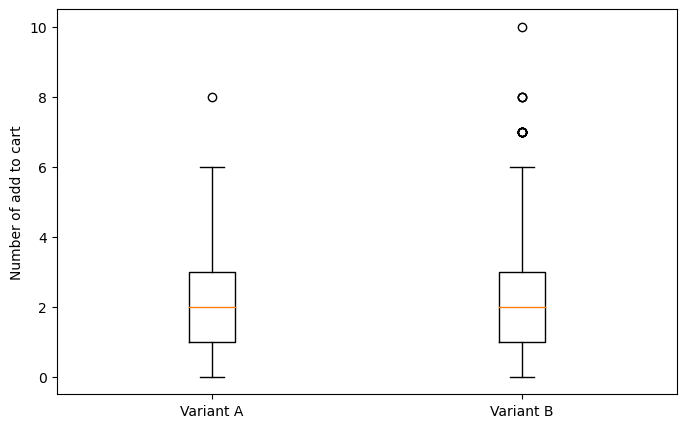

In [6]:
column = 'Number of add to cart'

# Create a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([data[column][data['Variant'] == 'A'], data[column][data['Variant'] == 'B']], labels=['Variant A', 'Variant B'])
plt.ylabel(column)
plt.show()


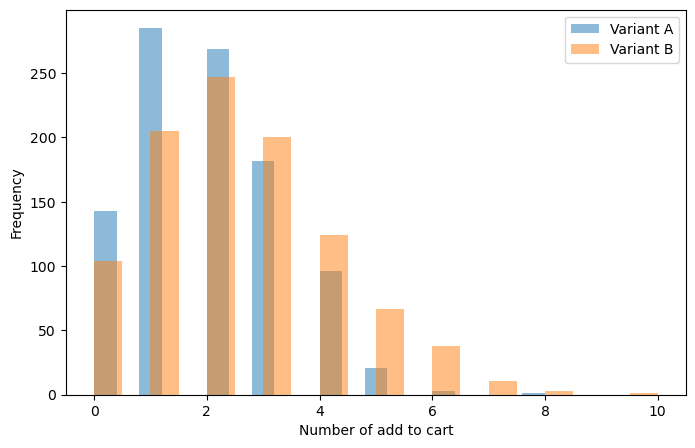

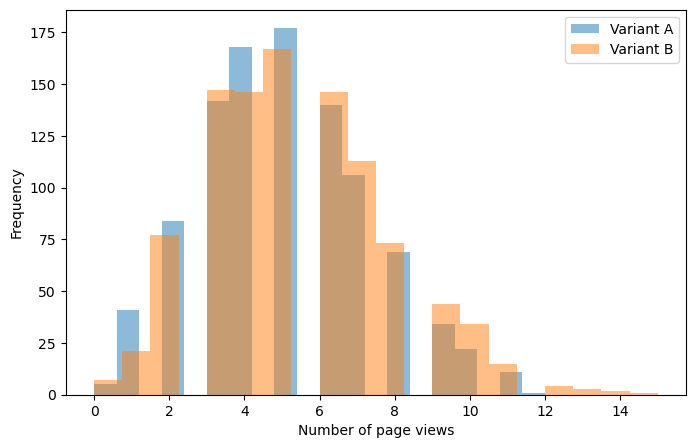

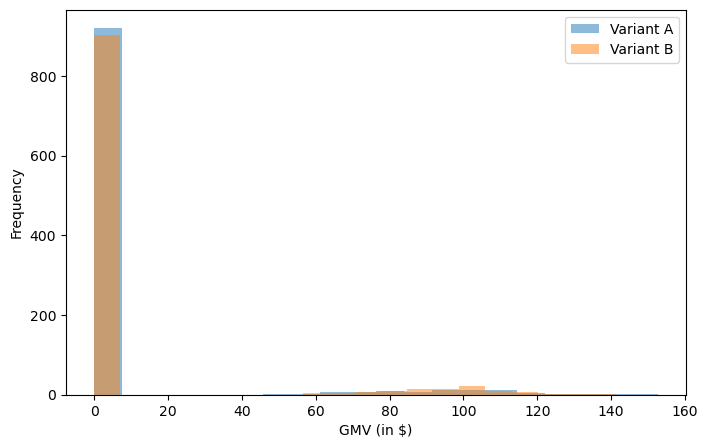

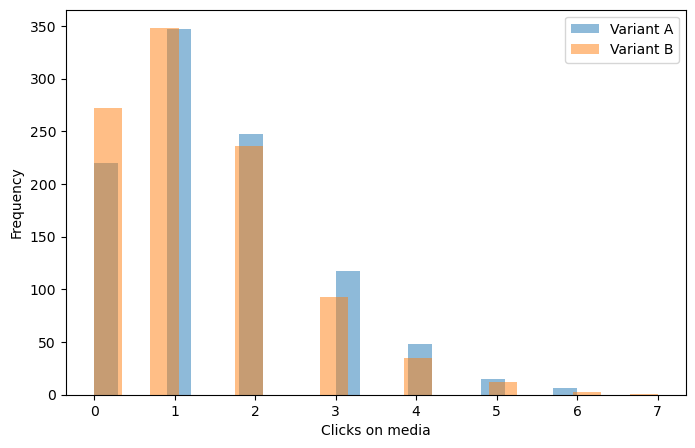

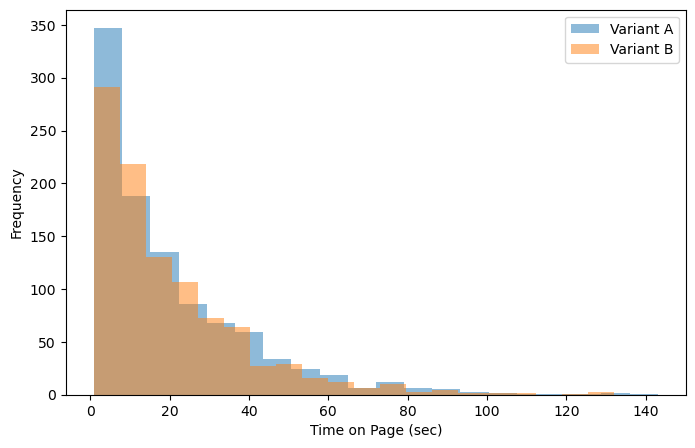

In [7]:
metrics = ['Number of add to cart', 'Number of page views', 'GMV (in $)', 'Clicks on media', 'Time on Page (sec)']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.hist(data[metric][data['Variant'] == 'A'], alpha=0.5, label='Variant A', bins=20)
    plt.hist(data[metric][data['Variant'] == 'B'], alpha=0.5, label='Variant B', bins=20)
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [8]:
# Perform t-test for each metric to see if improvement
for metric in ['Number of add to cart', 'Number of page views', 'Clicks on media', 'GMV (in $)', 'Time on Page (sec)']:
    t_statistic, p_value = ttest_ind(data[metric][data['Variant'] == 'A'],
                                     data[metric][data['Variant'] == 'B'], alternative='greater')
    print(f"{metric} - t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Reject null hypothesis for {metric}: Variants are statistically different.\n")
    else:
        print(f"Fail to reject null hypothesis for {metric}: No significant difference between variants.\n")
 

Number of add to cart - t-statistic: -8.7774, p-value: 1.0000
Fail to reject null hypothesis for Number of add to cart: No significant difference between variants.

Number of page views - t-statistic: -3.1882, p-value: 0.9993
Fail to reject null hypothesis for Number of page views: No significant difference between variants.

Clicks on media - t-statistic: 3.1711, p-value: 0.0008
Reject null hypothesis for Clicks on media: Variants are statistically different.

GMV (in $) - t-statistic: -1.2840, p-value: 0.9003
Fail to reject null hypothesis for GMV (in $): No significant difference between variants.

Time on Page (sec) - t-statistic: 0.5554, p-value: 0.2893
Fail to reject null hypothesis for Time on Page (sec): No significant difference between variants.



In [9]:
from scipy.stats import mannwhitneyu

for metric in ['Number of page views', 'Number of add to cart', 'Clicks on media', 'GMV (in $)', 'Time on Page (sec)']:
    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(data[metric][data['Variant'] == 'A'],
                                 data[metric][data['Variant'] == 'B'], alternative='greater')
    
    print(f"{metric} - U statistic: {stat:.4f}, p-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Reject null hypothesis for {metric}: Variants are statistically different.\n")
    else:
        print(f"Fail to reject null hypothesis for {metric}: No significant difference between variants.\n")


Number of page views - U statistic: 465664.5000, p-value: 0.9963
Fail to reject null hypothesis for Number of page views: No significant difference between variants.

Number of add to cart - U statistic: 403630.0000, p-value: 1.0000
Fail to reject null hypothesis for Number of add to cart: No significant difference between variants.

Clicks on media - U statistic: 539787.5000, p-value: 0.0007
Reject null hypothesis for Clicks on media: Variants are statistically different.

GMV (in $) - U statistic: 491552.0000, p-value: 0.9079
Fail to reject null hypothesis for GMV (in $): No significant difference between variants.

Time on Page (sec) - U statistic: 495746.5000, p-value: 0.6291
Fail to reject null hypothesis for Time on Page (sec): No significant difference between variants.



In [10]:
import pingouin as pg

# Perform t-test for each metric to see if improvement
for metric in ['Number of page views', 'Number of add to cart', 'Clicks on media', 'GMV (in $)', 'Time on Page (sec)']:
    t_test_result = pg.ttest(data[metric][data['Variant'] == 'A'],
                              data[metric][data['Variant'] == 'B'], correction=True, alternative='greater')
    
    t_statistic = t_test_result['T'].values[0]
    p_value = t_test_result['p-val'].values[0]
    
    print(f"{metric} - t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Reject null hypothesis for {metric}: Variants are statistically different.\n")
    else:
        print(f"Fail to reject null hypothesis for {metric}: No significant difference between variants.\n")


ModuleNotFoundError: No module named 'pingouin'

In [ ]:
# Perform t-test for each metric to see if improvement
for metric in ['Number of page views', 'Number of add to cart', 'Clicks on media', 'GMV (in $)', 'Time on Page (sec)']:
    t_statistic, p_value = ttest_ind(data[metric][data['Variant'] == 'A'],
                                     data[metric][data['Variant'] == 'B'], alternative='greater')
    print(f"{metric} - t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Reject null hypothesis for {metric}: Variants are statistically different.\n")
    else:
        print(f"Fail to reject null hypothesis for {metric}: No significant difference between variants.\n")
